## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import glob
from sklearn import metrics

In [2]:
def match_string_with_patterns(patterns, target_string):
    """
    Checks if the target string matches any pattern in the given list.

    Args:
        patterns (list): List of string patterns.
        target_string (str): The string to check against the patterns.

    Returns:
        bool: True if the target string matches any pattern, False otherwise.
    """
    for pattern in patterns:
        if pattern in target_string:
            return True
    return False

# Normal

In [221]:
IRFundus_records = "/home/ahmad/ahmad_experiments/retinal_data/IRFundus/irfundusset_master_catalogue.csv"

data_path_dict = {
    "stare": '/home/ahmad/ahmad_experiments/retinal_data/Stare',
    "idrid" : '/home/ahmad/ahmad_experiments/retinal_data/idrid',
    "kaggle_dr_train" : "/home/ahmad/ahmad_experiments/retinal_data/Diabetic_Retinopathy/diabetic-retinopathy-detection/train",
    "kaggle_dr_test" : "/home/ahmad/ahmad_experiments/retinal_data/Diabetic_Retinopathy/diabetic-retinopathy-detection/test",
    "hrf_path" : "/home/ahmad/ahmad_experiments/retinal_data/HRF/images",
    "odir" : "/home/ahmad/ahmad_experiments/retinal_data/ODIR-5k",
    "kaggle_1000" : "/home/ahmad/ahmad_experiments/retinal_data/kaggle_1000",
    "papila" : "/home/ahmad/ahmad_experiments/retinal_data/Papila/FundusImages",
    "chase" : "/home/ahmad/ahmad_experiments/retinal_data/chase",
    "five_path_train" : "/home/ahmad/ahmad_experiments/retinal_data/FIVES/train",
    "five_path_test" : "/home/ahmad/ahmad_experiments/retinal_data/FIVES/test",
    "cataracts_path" : "/home/ahmad/ahmad_experiments/retinal_data/Cataract/dataset"

}
spie_normal_path_train = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/normal'
spie_normal_path_test = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/normal'
spie_normal_path_val =  '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/normal'

spie_amd_path_train = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/amd'
spie_amd_path_test = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/amd'
spie_amd_path_val =  '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/amd'

spie_myopia_path_train = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/myopia'
spie_myopia_path_test = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/myopia'
spie_myopia_path_val =  '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/myopia'

spie_cataract_path_train = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/cataracts'
spie_cataract_path_test = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/cataracts'
spie_cataract_path_val =  '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/cataracts'

spie_train_path = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/'
spie_test_path = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/'
spie_val_path = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/'

In [31]:
df = pd.read_csv(IRFundus_records)

In [32]:
df.head(5)

,image_id,image_name,cohort,is_normal,src_is_normal,src_condition,is_left_or_right_eye,is_onh_or_macula_centered,image_fpath,src_train_test_split
0,deee356ae2c41b92534189365e3c905e3aa78345e177b9...,im0001,STARE,Not normal,Not Normal,BDR/NPDR,Left Eye,MAC,im0001.ppm,NaN
1,5ef74a8950819adac1307a4ce5dd6e4836f99445fd5705...,im0002,STARE,Not normal,Not Normal,"ASR,CNV",Left Eye,MAC,im0002.ppm,NaN
2,c901d29e1b92d6cbaf693ce951877cccbc9075b7c1b412...,im0003,STARE,Not normal,Not Normal,UNDEF,Left Eye,MAC,im0003.ppm,NaN
3,cbf2ed574244168dc417ab00b2144347946dfeaea55cf5...,im0004,STARE,Not normal,Not Normal,"CRAO,UNDEF",Right Eye,MAC,im0004.ppm,NaN
4,f268e641544e94a3e5fde96dfecf7e9f055eb673469139...,im0005,STARE,Not normal,Not Normal,"CRAO,CRVO",Right Eye,MAC,im0005.ppm,NaN


In [33]:
normal_df = df.loc[(df['is_normal'] == "Normal") & (df['is_onh_or_macula_centered'] != 'ONH')]

In [34]:
normal_df

,image_id,image_name,cohort,is_normal,src_is_normal,src_condition,is_left_or_right_eye,is_onh_or_macula_centered,image_fpath,src_train_test_split
31,400583b1ac5d9449a6b099a54d2530a9e27bc4264609da...,im0032,STARE,Normal,Normal,NORM,Left Eye,MAC,im0032.ppm,NaN
74,ac059e6893f58e4e56fb4d327917b2d03df62f2c83a44b...,im0076,STARE,Normal,Normal,NORM,Right Eye,MAC,im0076.ppm,NaN
79,677a106d5c447f55280a77073c6abced9b58625d2b77f1...,im0081,STARE,Normal,Normal,NORM,Left Eye,MAC,im0081.ppm,NaN
80,255e4c9be0ed9b02ed34fa496fcec1601767ed4748a9d3...,im0082,STARE,Normal,Normal,NORM,Right Eye,MAC,im0082.ppm,NaN
115,7eae9aac806fcb9d96fcc1c9773ed877b02ca910e1ea7e...,im0119,STARE,Normal,Normal,NORM,Left Eye,MAC,im0119.ppm,NaN
...,...,...,...,...,...,...,...,...,...,...
45752,4386d7e172510a57e0bf5225196f627c2ccb5c04ca5f3b...,NL_290,Retina Cataracts,Normal,Normal,normal,Left Eye,MAC,1_normal/NL_290.png,NaN
45753,1eea595f2f87a1be12b8fe94c0e8463ae731b27733ec84...,NL_291,Retina Cataracts,Normal,Normal,normal,Right Eye,MAC,1_normal/NL_291.png,NaN
45754,484da8c89ab15ccb602f4444d05e43c1d4dbebbbf49a35...,NL_292,Retina Cataracts,Normal,Normal,normal,Left Eye,MAC,1_normal/NL_292.png,NaN
45755,a7c04557d2ad96bc5274ff3d719d38eddc712b3d810b8d...,NL_293,Retina Cataracts,Normal,Normal,normal,Right Eye,MAC,1_normal/NL_293.png,NaN


In [35]:
value_counts = normal_df['cohort'].value_counts(normalize=True) * 100
print(value_counts)

cohort
EyePACS             62.959720
ODIR                23.992995
FIVE                 4.115587
IDRiD                3.502627
Retina Cataracts     3.269119
Kaggle1000           1.021600
STARE                0.671337
HRF                  0.379451
PAPILA               0.087566
Name: proportion, dtype: float64


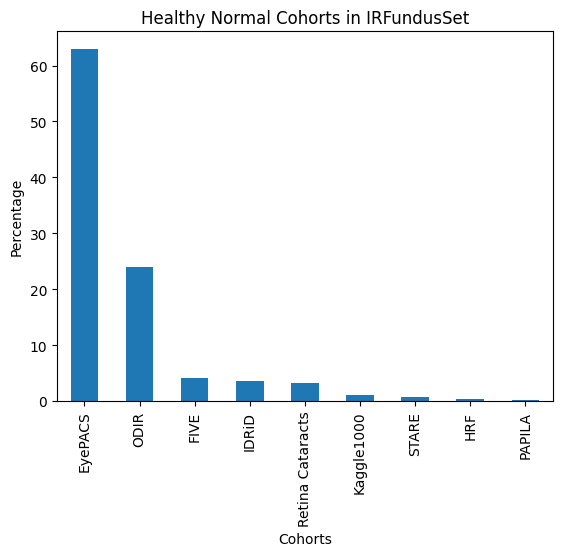

In [36]:
value_counts.plot(kind='bar')
plt.xlabel('Cohorts')
plt.ylabel('Percentage')
plt.title('Healthy Normal Cohorts in IRFundusSet')
plt.show()

In [57]:
for index, rows in normal_df.iterrows():
    if rows['cohort'] == 'STARE':
        image_path = os.path.join(data_path_dict['stare'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_test)
    elif rows['cohort'] == 'IDRiD':
        image_path = os.path.join(data_path_dict['idrid'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_val)
    elif rows['cohort'] == 'Kaggle1000':
        image_path = os.path.join(data_path_dict['kaggle_1000'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_test)
    elif rows['cohort'] == 'PAPILA':
        image_path = os.path.join(data_path_dict['papila'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_test)
    elif rows['cohort'] == 'HRF':
        image_path = os.path.join(data_path_dict['hrf_path'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_test)
    elif rows['cohort'] == 'FIVE':
        if rows['src_train_test_split'] == 'train':
            image_path = os.path.join(data_path_dict['five_path_train'], rows['image_fpath'])
        else:
            image_path = os.path.join(data_path_dict['five_path_test'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_val)
    elif rows['cohort'] == 'EyePACS':
        image_path = os.path.join(data_path_dict['kaggle_dr_train'], rows['image_fpath'])
        if os.path.exists(image_path):
            shutil.copy2(image_path, spie_normal_path_train)
        else: 
            image_path = os.path.join(data_path_dict['kaggle_dr_test'], rows['image_fpath'])
            shutil.copy2(image_path, spie_normal_path_train)
    elif rows['cohort'] == 'ODIR':
        image_path = os.path.join(data_path_dict['odir'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_train)
    elif rows['cohort'] == 'Retina Cataracts':
        image_path = os.path.join(data_path_dict['cataracts_path'], rows['image_fpath'])
        shutil.copy2(image_path, spie_normal_path_val)
    
    print(f"{index}: Copied image {rows['image_fpath']} from {rows['cohort']}")

31: Copied image im0032.ppm from STARE
74: Copied image im0076.ppm from STARE
79: Copied image im0081.ppm from STARE
80: Copied image im0082.ppm from STARE
115: Copied image im0119.ppm from STARE
116: Copied image im0120.ppm from STARE
157: Copied image im0162.ppm from STARE
164: Copied image im0170.ppm from STARE
184: Copied image im0190.ppm from STARE
213: Copied image im0219.ppm from STARE
228: Copied image im0234.ppm from STARE
229: Copied image im0235.ppm from STARE
230: Copied image im0236.ppm from STARE
231: Copied image im0237.ppm from STARE
232: Copied image im0238.ppm from STARE
233: Copied image im0239.ppm from STARE
234: Copied image im0240.ppm from STARE
237: Copied image im0243.ppm from STARE
238: Copied image im0244.ppm from STARE
239: Copied image im0245.ppm from STARE
246: Copied image im0252.ppm from STARE
248: Copied image im0254.ppm from STARE
249: Copied image im0255.ppm from STARE
532: Copied image 1. Original Images/b. Testing Set/IDRiD_029.jpg from IDRiD
534: Co

# JustRAIGS

In [119]:
just_raigs_dir_path = '/home/ahmad/ahmad_experiments/retinal_data/JustRAIGS'
just_raigs_csv_path = "/home/ahmad/ahmad_experiments/retinal_data/JustRAIGS/JustRAIGS_Train_labels.csv"
glaucoma_destination_path_train = "/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/glaucoma"
glaucoma_destination_path_test = "/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/glaucoma"
glaucoma_destination_path_val = "/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/glaucoma"

glaucoma_pattern = f"{just_raigs_dir_path}/*/*"

In [120]:
raigs_csv = pd.read_csv(just_raigs_csv_path)

In [121]:
raigs_csv.head()

,Eye ID,Final_label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
0,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
rg_glaucoma = raigs_csv.loc[raigs_csv['Final_label'] == 'RG']

In [123]:
rg_glaucoma

,Eye ID,Final_label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
34,TRAIN000034,RG,NaN,32.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,TRAIN000060,RG,NaN,74.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,TRAIN000068,RG,TRAIN012581,64.0,RG,NRG,RG,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
100,TRAIN000100,RG,NaN,77.0,RG,NRG,RG,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
106,TRAIN000106,RG,TRAIN014144,81.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101296,TRAIN101315,RG,TRAIN032604,55.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101339,TRAIN101358,RG,TRAIN008388,84.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101343,TRAIN101362,RG,TRAIN060851,67.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101348,TRAIN101367,RG,NaN,57.0,RG,RG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
rg_glaucoma['Fellow Eye ID'].fillna(value='-1', inplace=True)

/tmp/ipykernel_725178/1531625034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rg_glaucoma['Fellow Eye ID'].fillna(value='-1', inplace=True)
/tmp/ipykernel_725178/1531625034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rg_glaucoma['Fellow Eye ID'].fillna(value='-1', inplace=True)


In [125]:
rg_glaucoma

,Eye ID,Final_label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
34,TRAIN000034,RG,-1,32.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,TRAIN000060,RG,-1,74.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,TRAIN000068,RG,TRAIN012581,64.0,RG,NRG,RG,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
100,TRAIN000100,RG,-1,77.0,RG,NRG,RG,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
106,TRAIN000106,RG,TRAIN014144,81.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101296,TRAIN101315,RG,TRAIN032604,55.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101339,TRAIN101358,RG,TRAIN008388,84.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101343,TRAIN101362,RG,TRAIN060851,67.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101348,TRAIN101367,RG,-1,57.0,RG,RG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
eye_ids = rg_glaucoma['Eye ID'].values
print(type(eye_ids))

<class 'numpy.ndarray'>


In [127]:
print(len(rg_glaucoma))

3270


In [139]:
s = rg_glaucoma.groupby('Eye ID')

In [141]:
print(s)

In [250]:
eye_series = rg_glaucoma['Eye ID'].to_list()
fellow_series = rg_glaucoma['Fellow Eye ID'].to_list()

In [251]:
fellow_series

['-1',
 '-1',
 'TRAIN012581',
 '-1',
 'TRAIN014144',
 'TRAIN044306',
 'TRAIN002695',
 '-1',
 'TRAIN035113',
 'TRAIN090999',
 'TRAIN073663',
 'TRAIN102041',
 'TRAIN061475',
 'TRAIN076538',
 'TRAIN071948',
 'TRAIN033670',
 'TRAIN012637',
 'TRAIN057619',
 'TRAIN033393',
 'TRAIN017162',
 'TRAIN072847',
 'TRAIN067088',
 'TRAIN042078',
 'TRAIN028069',
 'TRAIN042785',
 'TRAIN020830',
 'TRAIN003306',
 'TRAIN030200',
 'TRAIN076584',
 'TRAIN023171',
 'TRAIN007528',
 'TRAIN045640',
 'TRAIN100026',
 'TRAIN021643',
 'TRAIN073156',
 '-1',
 'TRAIN042274',
 '-1',
 'TRAIN014665',
 '-1',
 'TRAIN055497',
 'TRAIN005569',
 'TRAIN067312',
 'TRAIN016054',
 'TRAIN015938',
 'TRAIN014660',
 'TRAIN012953',
 '-1',
 'TRAIN080662',
 'TRAIN090328',
 'TRAIN083096',
 'TRAIN089431',
 'TRAIN072986',
 'TRAIN005740',
 'TRAIN032595',
 'TRAIN068465',
 'TRAIN031174',
 'TRAIN059585',
 'TRAIN018233',
 'TRAIN016997',
 'TRAIN070070',
 '-1',
 'TRAIN066112',
 'TRAIN010081',
 'TRAIN028189',
 'TRAIN028021',
 'TRAIN049253',
 'TRAIN09

In [258]:
from random import shuffle

# I don't really use pandas, so I prefer to use sets, lists and dicts:
all_eye_ids = {-1}
fellow_mapping = {}
for _, row in rg_glaucoma.iterrows():
   eye_id = row['Eye ID']
   fellow_id = row['Fellow Eye ID']

   
   all_eye_ids.add(eye_id)
   if fellow_id in eye_series:
      all_eye_ids.add(fellow_id)
   
   if not fellow_id == -1:
       fellow_mapping[eye_id] = fellow_id
       fellow_mapping[fellow_id] = eye_id
all_eye_ids.discard(-1)

# For testing, you can comment out the above and generate dummy data as follows:
#all_eye_ids = [i for i in range(1, 101)]
#fellow_mapping = {100-i : i for i in all_eye_ids if i%2}

# Now we can just use really simple code to partition the eyes
PROP_TRAIN = 0.85
PROP_VAL   = 0.05
assert (PROP_TRAIN + PROP_VAL < 1) # No need to define PROP_TEST

# Sampling from sets using random.sample was deprecated in python 3.9, so convert to a list and use shuffle/pop instead
all_eye_ids = list(all_eye_ids)
print(len(all_eye_ids))
shuffle(all_eye_ids)
def sample_n(n):
    _list = []
    while len(_list) < n:
        eye_id = all_eye_ids.pop()
        _list.append(eye_id)
        if eye_id in fellow_mapping:
            fellow_id = fellow_mapping[eye_id]
            if fellow_id in all_eye_ids:
                all_eye_ids.remove(fellow_id)
                _list.append(fellow_id)
    return _list
    
number_of_eyes = len(all_eye_ids)
train_gl = sample_n(int(number_of_eyes * PROP_TRAIN))
val_gl   = sample_n(int(number_of_eyes * PROP_VAL))
test_gl  = all_eye_ids




3270


In [259]:
len(train_gl), len(val_gl), len(test_gl)

(2779, 163, 328)

In [260]:
for count, img in enumerate(glob.glob(glaucoma_pattern)):
    if match_string_with_patterns(train_gl ,img):
        shutil.copy2(img, glaucoma_destination_path_train) 
    elif match_string_with_patterns(val_gl ,img):
        shutil.copy2(img, glaucoma_destination_path_val)
    elif match_string_with_patterns(test_gl ,img):
        shutil.copy2(img, glaucoma_destination_path_test)
        


print(len(os.listdir(glaucoma_destination_path_train)),len(os.listdir(glaucoma_destination_path_val)), len(os.listdir(glaucoma_destination_path_test)))

2779 163 328


# DR: done


In [10]:
dr_destination_path = '/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/DR'
dr_destination_path_train = '/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/train/dr'
dr_destination_path_val = "/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/val/dr"
dr_destination_path_test = "/home/ahmad/ahmad_experiments/retinal_data/SPIE_data_split/test/dr"
dr_train_csv = "/home/ahmad/ahmad_experiments/retinal_data/Diabetic_Retinopathy/diabetic-retinopathy-detection/trainLabels.csv"
dr_train_images = "/home/ahmad/ahmad_experiments/retinal_data/Diabetic_Retinopathy/diabetic-retinopathy-detection/train"

dr_csv = pd.read_csv(dr_train_csv)

In [11]:
dr_csv

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [12]:
count = 0
all_images_diseased = []
for index, rows in dr_csv.iterrows():
    if rows['level'] != 0:
        all_images_diseased.append(rows['image'])

        # image_path = os.path.join(dr_train_images, (rows['image'] + '.jpeg'))
        # shutil.copy2(image_path, dr_destination_path)
        # count += 1




In [13]:
patients = {}

for id in all_images_diseased:
    id, direction = id.split("_")[0], id.split("_")[1]
    patients[id] = patients.get(id,"") + direction

print(len(patients), len(all_images_diseased))

5408 9316


In [14]:
both = []
right = []
left = []

for id,direction in patients.items():
    if direction == 'leftright' or direction == 'rightleft':
        both.append(id)
    elif direction == 'left':
        left.append(id)
    elif direction == 'right':
        right.append(id)

print(len(both), len(right), len(left))

3908 716 784


In [15]:
dr_train = []
dr_test = []
dr_val = []

total_images = len(all_images_diseased)
train_len = 0.85 * total_images
val_len = 0.1 * total_images
test_len =  total_images-train_len-val_len
count = 0
print(train_len,val_len,test_len)
for id,direction in patients.items():
    
    if direction == 'leftright' or direction == 'rightleft':
        count+=2
        if len(dr_train) < train_len:
            dr_train.append(id + '_left')
            dr_train.append(id + '_right')
        elif len(dr_val) < val_len:
            dr_val.append(id + '_left')
            dr_val.append(id + '_right')
        elif len(dr_test) < test_len:
            dr_test.append(id + '_left')
            dr_test.append(id + '_right')

    elif direction == 'left':
        count+=1
        if len(dr_train) < train_len:
            dr_train.append(id + '_left')
        elif len(dr_val) < val_len:
            dr_val.append(id + '_left')
        elif len(dr_test) < test_len:
            dr_test.append(id + '_left')
            
    elif direction == 'right':
        count+=1
        if len(dr_train) < train_len:
            dr_train.append(id + '_right')
        elif len(dr_val) < val_len:
            dr_val.append(id + '_right')
        elif len(dr_test) < test_len:
            dr_test.append(id + '_right')
print(count)

7918.599999999999 931.6 465.8000000000005
9316


In [16]:
len(dr_train), len(dr_test), len(dr_val)

(7919, 465, 932)

In [17]:
for image in dr_train:
    image_path = os.path.join(dr_train_images, (image + '.jpeg'))
    shutil.copy2(image_path, dr_destination_path_train)

for image in dr_val:
    image_path = os.path.join(dr_train_images, (image + '.jpeg'))
    shutil.copy2(image_path, dr_destination_path_val)

for image in dr_test:
    image_path = os.path.join(dr_train_images, (image + '.jpeg'))
    shutil.copy2(image_path, dr_destination_path_test)


# image_path = os.path.join(dr_train_images, (rows['image'] + '.jpeg'))
        # shutil.copy2(image_path, dr_destination_path)
        # count += 1

# RFMID


In [239]:
rfmid_train_dir = '/home/ahmad/ahmad_experiments/retinal_data/RFMID/Training_Set/Training'
rfmid_train_csv_path = '/home/ahmad/ahmad_experiments/retinal_data/RFMID/Training_Set/RFMiD_Training_Labels.csv'

rfmid_val_dir = "/home/ahmad/ahmad_experiments/retinal_data/RFMID/Evaluation_Set/Validation"
rfmid_val_csv_path = "/home/ahmad/ahmad_experiments/retinal_data/RFMID/Evaluation_Set/RFMiD_Validation_Labels.csv"

rfmid_test_dir = "/home/ahmad/ahmad_experiments/retinal_data/RFMID/Test_Set/Test"
rfmid_test_csv_path = "/home/ahmad/ahmad_experiments/retinal_data/RFMID/Test_Set/RFMiD_Testing_Labels.csv"
normal_destination_path = "/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/Normal_unprocessed"
myopia_destination_path = "/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/Myopia"
amd_destination_path = '/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/AMD'

rfmid_train_csv = pd.read_csv(rfmid_train_csv_path)
rfmid_test_csv = pd.read_csv(rfmid_test_csv_path)
rfmid_val_csv = pd.read_csv(rfmid_val_csv_path)
# Disease_risk, ARMD : Age related Macular Degeneration, MYA: Myopia 

In [240]:
rfmid_train_csv

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
rfmid_train_csv.columns

Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')

## Normal, AMD, MYA

In [248]:
n_t,n_te,n_v, a_t,a_te, a_v, m_t,m_te,m_v = 0,0,0,0,0,0,0,0,0
for index, rows in rfmid_train_csv.iterrows():
    img_file = str(rows['ID']) + '.png'
    img = os.path.join(rfmid_train_dir, img_file)
    if rows['Disease_Risk'] == 0:
        shutil.copy2(img, spie_normal_path_train)
        n_t +=1
    else:
        if rows['ARMD'] == 1:
            shutil.copy2(img, spie_amd_path_train)
            a_t += 1
        if rows['MYA'] == 1:
            shutil.copy2(img, spie_myopia_path_train)
            m_t += 1

for index, rows in rfmid_test_csv.iterrows():
    img_file = str(rows['ID']) + '.png'
    img = os.path.join(rfmid_test_dir, img_file)
    if rows['Disease_Risk'] == 0:
        shutil.copy2(img, spie_normal_path_test)
        n_te +=1
    else:
        if rows['ARMD'] == 1:
            shutil.copy2(img, spie_amd_path_test)
            a_te += 1
        if rows['MYA'] == 1:
            shutil.copy2(img, spie_myopia_path_test)
            m_te += 1


for index, rows in rfmid_val_csv.iterrows():
    img_file = str(rows['ID']) + '.png'
    img = os.path.join(rfmid_val_dir, img_file)
    if rows['Disease_Risk'] == 0:
        shutil.copy2(img, spie_normal_path_val)
        n_v +=1
    else:
        if rows['ARMD'] == 1:
            shutil.copy2(img, spie_amd_path_val)
            a_v += 1
        if rows['MYA'] == 1:
            shutil.copy2(img, spie_myopia_path_val)
            m_v += 1


In [205]:
n_t,n_te,n_v, a_t,a_te, a_v, m_t,m_te,m_v

(401, 134, 134, 100, 31, 38, 101, 32, 34)

# PALM

In [206]:
## Validation
validation_dir = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Validation/Images'
validation_csv_path = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Validation/Classification_Labels.xlsx'
validation_csv = pd.read_excel(validation_csv_path)


## Training
train_dir = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Training/Images'
train_csv_path = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Training/Classification_Labels.xlsx'
train_csv = pd.read_excel(train_csv_path)

## Testing
test_dir = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Testing/Images'
test_csv_path = '/home/ahmad/ahmad_experiments/retinal_data/PALM/PALM/Testing/Classification_Labels.xlsx'
test_csv = pd.read_excel(test_csv_path)



In [207]:
train_csv.columns, validation_csv.columns, test_csv.columns

(Index(['imgName', 'Label'], dtype='object'),
 Index(['imgName', 'Label'], dtype='object'),
 Index(['imgName', 'Label'], dtype='object'))

In [208]:
train_csv.head()

,imgName,Label
0,H0001.jpg,0
1,H0002.jpg,0
2,H0003.jpg,0
3,H0004.jpg,0
4,H0005.jpg,0


In [210]:
t_count,te_count, v_count = 0,0,0
for index, rows in train_csv.iterrows():
    img_path = os.path.join(train_dir, rows['imgName'])
    if rows['Label'] == 1:
        shutil.copy2(img_path, spie_myopia_path_train)
        t_count += 1

print(f"Copied: {t_count} images")

for index, rows in validation_csv.iterrows():
    img_path = os.path.join(validation_dir, rows['imgName'])
    if rows['Label'] == 1:
        shutil.copy2(img_path, spie_myopia_path_val)
        v_count += 1

print(f"Copied: {v_count} images")


for index, rows in test_csv.iterrows():
    img_path = os.path.join(test_dir, rows['imgName'])
    if rows['Label'] == 1:
        shutil.copy2(img_path, spie_myopia_path_test)
        te_count += 1

print(f"Copied: {te_count} images")

Copied: 213 images
Copied: 211 images
Copied: 213 images


# Cataracts: Done

# ODIR

In [222]:
odir_csv_path = "/home/ahmad/ahmad_experiments/retinal_data/ODIR/ODIR-5K_Training_Annotations(Updated)_V2.xlsx"
odir_images_train = "/home/ahmad/ahmad_experiments/retinal_data/ODIR/ODIR-5K_Training_Dataset"
odir_images_test = "/home/ahmad/ahmad_experiments/retinal_data/ODIR/ODIR-5K_Testing_Images"

normal_destination_path = "/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/Normal"
cataract_destination_path = "/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/Cataract"
amd_destination_path = '/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/AMD'

odir_csv = pd.read_excel(odir_csv_path)

In [223]:
odir_csv.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [243]:
amd_train_split = 0.85 * 280
amd_test_split = 0.1 * 280
amd_val_split = 0.05 * 280



In [246]:
amd_train_split, amd_test_split , amd_val_split

(238.0, 28.0, 14.0)

In [249]:
cataract_count = 0
amd_count = 0
train_images = os.listdir(odir_images_train)
test_images = os.listdir(odir_images_test)
train_amd_count, test_amd_count, val_amd_count = 0,0,0

for index, rows in odir_csv.iterrows():
    # if  'cataract' in rows['Left-Diagnostic Keywords'] :
    #     left_image = rows['Left-Fundus'] 
    #     if left_image in train_images:
    #         shutil.copy2(os.path.join(odir_images_train, left_image), spie_cataract_path_train)
    #     elif left_image in test_images:
    #         shutil.copy2(os.path.join(odir_images_test, left_image), spie_cataract_path_train)
    #     cataract_count += 1

    # if 'age-related macular degeneration' in rows['Left-Diagnostic Keywords']:
    #     left_image = rows['Left-Fundus'] 
    #     if left_image in train_images:
    #         shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_train)
    #     elif left_image in test_images:
    #         shutil.copy2(os.path.join(odir_images_test, left_image), spie_amd_path_train)
    #     amd_count += 1

    # if  'cataract' in rows['Right-Diagnostic Keywords']:
    #     right_image = rows['Right-Fundus'] 
    #     if right_image in train_images:
    #         shutil.copy2(os.path.join(odir_images_train, right_image), spie_cataract_path_train)
    #     elif right_image in test_images:
    #         shutil.copy2(os.path.join(odir_images_test, right_image), spie_cataract_path_train)
    #     cataract_count += 1

    # elif  'age-related macular degeneration' in rows['Right-Diagnostic Keywords']:
    #     right_image = rows['Right-Fundus'] 
    #     if right_image in train_images:
    #         shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_train)
    #     elif right_image in test_images:
    #         shutil.copy2(os.path.join(odir_images_test, right_image), spie_amd_path_train)
    #     amd_count += 1

    if 'age-related macular degeneration' in rows['Left-Diagnostic Keywords'] and 'age-related macular degeneration' in rows['Right-Diagnostic Keywords']:
        left_image = rows['Left-Fundus'] 
        right_image = rows['Right-Fundus'] 
        if left_image in train_images:
            if train_amd_count < amd_train_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_train)
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_train)
                train_amd_count += 2
            elif val_amd_count < amd_val_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_val)
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_val)
                val_amd_count += 2
            elif test_amd_count < amd_test_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_test)
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_test)
                test_amd_count += 2
        
    elif 'age-related macular degeneration' in rows['Left-Diagnostic Keywords'] and 'age-related macular degeneration' not in rows['Right-Diagnostic Keywords']:
        left_image = rows['Left-Fundus'] 
        
        if left_image in train_images:
            if train_amd_count < amd_train_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_train)
                
                train_amd_count += 1
            elif val_amd_count < amd_val_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_val)
                
                val_amd_count += 1
            elif test_amd_count < amd_test_split:
                shutil.copy2(os.path.join(odir_images_train, left_image), spie_amd_path_test)
                
                test_amd_count += 1

    elif 'age-related macular degeneration' not in rows['Left-Diagnostic Keywords'] and 'age-related macular degeneration' in rows['Right-Diagnostic Keywords']:
        
        right_image = rows['Right-Fundus'] 
        if left_image in train_images:
            if train_amd_count < amd_train_split:
                
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_train)
                train_amd_count += 1
            elif val_amd_count < amd_val_split:
                
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_val)
                val_amd_count += 1
            elif test_amd_count < amd_test_split:
                
                shutil.copy2(os.path.join(odir_images_train, right_image), spie_amd_path_test)
                test_amd_count += 1
        

print(f"Cataract: {cataract_count}, AMD: {train_amd_count,val_amd_count, test_amd_count}")    
   


Cataract: 0, AMD: (238, 14, 28)


In [235]:
cataract_images = os.listdir(spie_cataract_path_train)
cataract_images_total = len(cataract_images)

cataract_train_len = cataract_images_total * 0.8
cataract_val_len = cataract_images_total * 0.1
cataract_test_len = cataract_images_total * 0.1

cataract_train = []
cataract_val = []
cataract_test = []

patients = {}

for id in cataract_images:
    id, direction = id.split("_")[0], id.split("_")[1]
    patients[id] = patients.get(id,"") + direction

for id,direction in patients.items():
    
    if direction == 'left.jpgright.jpg' or direction == 'right.jpgleft.jpg':
        count+=2
        if len(cataract_train) < cataract_train_len:
            cataract_train.append(id + '_left.jpg')
            cataract_train.append(id + '_right.jpg')
        elif len(cataract_val) < cataract_val_len:
            cataract_val.append(id + '_left.jpg')
            cataract_val.append(id + '_right.jpg')
        elif len(cataract_test) < cataract_test_len:
            cataract_test.append(id + '_left.jpg')
            cataract_test.append(id + '_right.jpg')

    elif direction == 'left.jpg':
        count+=1
        if len(cataract_train) < cataract_train_len:
            cataract_train.append(id + '_left.jpg')
        elif len(cataract_val) < cataract_val_len:
            cataract_val.append(id + '_left.jpg')
        elif len(cataract_test) < cataract_test_len:
            cataract_test.append(id + '_left.jpg')
            
    elif direction == 'right.jpg':
        count+=1
        if len(cataract_train) < cataract_train_len:
            cataract_train.append(id + '_right.jpg')
        elif len(cataract_val) < cataract_val_len:
            cataract_val.append(id + '_right.jpg')
        elif len(cataract_test) < cataract_test_len:
            cataract_test.append(id + '_right.jpg')
    


In [236]:
len(cataract_test), len(cataract_train), len(cataract_val), cataract_test_len, cataract_train_len, cataract_val_len

(30, 251, 32, 31.3, 250.4, 31.3)

In [238]:
for image in cataract_test:
    image_path = os.path.join(spie_cataract_path_train, image)
    shutil.move(image_path,spie_cataract_path_test)

for image in cataract_val:
    image_path = os.path.join(spie_cataract_path_train, image)
    shutil.move(image_path,spie_cataract_path_val)  

# ADAM


In [211]:
adam_test_image_dir = "/home/ahmad/ahmad_experiments/retinal_data/ADAM/ADAM/Test/Test-image-400"
adam_test_gt = "/home/ahmad/ahmad_experiments/retinal_data/ADAM/ADAM/Test/test_classification_GT.txt"

adam_validation_image_dir = "/home/ahmad/ahmad_experiments/retinal_data/ADAM/ADAM/Validation/image"
adam_validation_gt = "/home/ahmad/ahmad_experiments/retinal_data/ADAM/ADAM/Validation/validation_classification_GT.txt"

destination = "/home/ahmad/ahmad_experiments/retinal_data/Dataset_SPIE/AMD"

In [212]:
test_csv = pd.read_csv(adam_test_gt, sep="  ", header=None)
val_csv = pd.read_csv(adam_validation_gt,sep=" ", header=None)

/tmp/ipykernel_725178/1624154312.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_csv = pd.read_csv(adam_test_gt, sep="  ", header=None)


In [213]:
test_csv.head()

,0,1
0,T0307.jpg,1
1,T0129.jpg,1
2,T0315.jpg,0
3,T0323.jpg,1
4,T0226.jpg,1


In [214]:
val_csv.head()

,0,1
0,V0001.jpg,0
1,V0002.jpg,0
2,V0003.jpg,0
3,V0004.jpg,0
4,V0005.jpg,0


In [215]:
t = 0
for index, rows in test_csv.iterrows():
    if rows[1] == 1:
        image_path = os.path.join(adam_test_image_dir, rows[0])
        shutil.copy2(image_path, spie_amd_path_test)
        t += 1
print(t)


v = 0 
for index, rows in val_csv.iterrows():
    if rows[1] == 1:
        image_path = os.path.join(adam_validation_image_dir, rows[0])
        shutil.copy2(image_path, spie_amd_path_val)
        v += 1


print(v)

89
89


# Confusion matrix

In [12]:
test_df = pd.read_csv('/home/ahmad/ahmad_experiments/retinal_cond_diff/new_scores/Test_trial_500_seed_0.csv')
test_df.head()

,Image,Predicted Label,Test Label,AMD mean score,Cataract mean score,DR mean score,Glaucoma mean score,Myopia mean score,Normal mean score
0,Test_image_1,0,0,0.002166,0.002327,0.002249,0.002210,0.002184,0.002265
1,Test_image_2,0,0,0.002734,0.002884,0.002855,0.002859,0.002764,0.002836
2,Test_image_3,4,0,0.001905,0.002001,0.001953,0.001938,0.001901,0.001952
3,Test_image_4,0,0,0.004362,0.004540,0.004484,0.004466,0.004370,0.004457
4,Test_image_5,0,0,0.001810,0.001924,0.001901,0.001900,0.001825,0.001881


In [13]:
preds = test_df['Predicted Label'].to_list()
targets = test_df['Test Label'].to_list()

In [21]:
confusion_matrix = metrics.confusion_matrix(targets, preds,normalize='true')

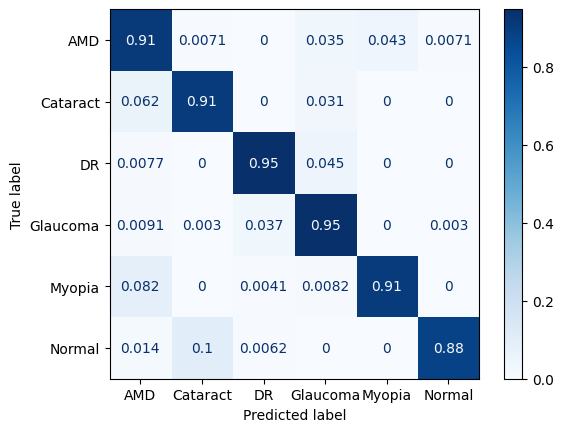

In [22]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["AMD", "Cataract", "DR", "Glaucoma", "Myopia", "Normal"])

cm_display.plot(cmap=plt.cm.Blues)
plt.show() 

In [5]:
import pickle

with open('/home/ahmad/ahmad_experiments/retinal_cond_diff/new_scores/Test_trial_10_seed_0.pkl', 'rb') as pickle_file:
    loaded_dict = pickle.load(pickle_file)
    print(loaded_dict)


{'/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0030.png': {'test_label': 0, 'class_errors_each_trial': [array([0.00010964, 0.00015735, 0.00018169, 0.00013915, 0.00011811,
       0.00016621], dtype=float32), array([0.00147604, 0.00161647, 0.00162449, 0.00153794, 0.00151543,
       0.00157586], dtype=float32), array([5.7102694e-05, 1.0417496e-04, 8.2915489e-05, 9.4506016e-05,
       9.1228248e-05, 8.7231900e-05], dtype=float32), array([1.9586054e-05, 2.0463087e-05, 2.2743303e-05, 1.9430348e-05,
       1.7955808e-05, 2.1222888e-05], dtype=float32), array([0.00040197, 0.00050604, 0.00045147, 0.00047556, 0.00042748,
       0.00042727], dtype=float32), array([0.00050208, 0.00064956, 0.00062662, 0.00055875, 0.00054571,
       0.00061387], dtype=float32), array([0.00010611, 0.00017757, 0.00015434, 0.00014437, 0.00013044,
       0.00014241], dtype=float32), array([6.251730e-05, 7.788618e-05, 8.856443e-05, 7.853539e-05,
       6.105919e-05, 8.657969e-05], dtype=float32), array

In [6]:
loaded_dict

{'/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0030.png': {'test_label': 0,
  'class_errors_each_trial': [array([0.00010964, 0.00015735, 0.00018169, 0.00013915, 0.00011811,
          0.00016621], dtype=float32),
   array([0.00147604, 0.00161647, 0.00162449, 0.00153794, 0.00151543,
          0.00157586], dtype=float32),
   array([5.7102694e-05, 1.0417496e-04, 8.2915489e-05, 9.4506016e-05,
          9.1228248e-05, 8.7231900e-05], dtype=float32),
   array([1.9586054e-05, 2.0463087e-05, 2.2743303e-05, 1.9430348e-05,
          1.7955808e-05, 2.1222888e-05], dtype=float32),
   array([0.00040197, 0.00050604, 0.00045147, 0.00047556, 0.00042748,
          0.00042727], dtype=float32),
   array([0.00050208, 0.00064956, 0.00062662, 0.00055875, 0.00054571,
          0.00061387], dtype=float32),
   array([0.00010611, 0.00017757, 0.00015434, 0.00014437, 0.00013044,
          0.00014241], dtype=float32),
   array([6.251730e-05, 7.788618e-05, 8.856443e-05, 7.853539e-05,
          6.1

In [7]:
for key, _ in loaded_dict.items():
    print(key)

/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0030.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0034.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0119.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/amd/V0135.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/cataract/2128_left.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/cataract/2128_right.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/cataract/2159_left.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/cataract/2160_right.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/dr/37586_left.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/dr/37982_left.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/dr/37982_right.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/dr/37984_left.png
/home/ahmad/ahmad_experiments/retinal_data/samples_cf/test/dr/37984_r